In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chardet

In [118]:
defense_df = pd.read_csv('Career_Stats_Defensive.csv')
defense_df.shape

(23998, 17)

In [119]:
defense_df.head()

,Player Id,Name,Position,Year,Team,Games Played,Total Tackles,Solo Tackles,Assisted Tackles,Sacks,Safties,Passes Defended,Ints,Ints for TDs,Int Yards,Yards Per Int,Longest Int Return
0,quinnjohnson/79593,"Johnson, Quinn",NaN,2013,Tennessee Titans,4,0,--,--,--,--,--,--,--,--,0.0,--
1,quinnjohnson/79593,"Johnson, Quinn",NaN,2012,Tennessee Titans,16,1,1,0,0.0,--,0,--,--,--,0.0,--
2,quinnjohnson/79593,"Johnson, Quinn",NaN,2011,Tennessee Titans,4,0,--,--,--,--,--,--,--,--,0.0,--
3,quinnjohnson/79593,"Johnson, Quinn",NaN,2011,Denver Broncos,0,0,--,--,--,--,--,--,--,--,0.0,--
4,quinnjohnson/79593,"Johnson, Quinn",NaN,2010,Green Bay Packers,11,4,4,0,0.0,--,0,--,--,--,0.0,--


In [120]:
defense_df = defense_df.replace('--', 0)
converter = {'Games Played': int, 'Total Tackles' : int, 'Sacks' : float, 'Passes Defended' : int, 'Ints' : int, 'Ints for TDs': int}
defense_df = defense_df.astype(str).astype(converter)
defense_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23998 entries, 0 to 23997
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Player Id           23998 non-null  object 
 1   Name                23998 non-null  object 
 2   Position            23998 non-null  object 
 3   Year                23998 non-null  object 
 4   Team                23998 non-null  object 
 5   Games Played        23998 non-null  int32  
 6   Total Tackles       23998 non-null  int32  
 7   Solo Tackles        23998 non-null  object 
 8   Assisted Tackles    23998 non-null  object 
 9   Sacks               23998 non-null  float64
 10  Safties             23998 non-null  object 
 11  Passes Defended     23998 non-null  int32  
 12  Ints                23998 non-null  int32  
 13  Ints for TDs        23998 non-null  int32  
 14  Int Yards           23998 non-null  object 
 15  Yards Per Int       23998 non-null  object 
 16  Long

In [121]:
defense_df_2000s = defense_df[defense_df['Year'] >= '2000']

In [122]:
defense_df_2000s = defense_df_2000s.groupby(by='Name').agg({'Games Played': 'sum', 'Total Tackles': 'sum', 'Sacks': 'sum', 'Ints': 'sum', 'Ints for TDs': 'sum'})

In [123]:
defense_df_2000s = defense_df_2000s.reset_index()
defense_df_2000s

,Name,Games Played,Total Tackles,Sacks,Ints,Ints for TDs
0,"Aaitui, Isaako",4,3,0.0,0,0
1,"Abdesmad, Mehdi",2,1,0.0,0,0
2,"Abdul-Quddus, Isa",89,241,2.0,4,0
3,"Abdullah, Ameer",18,4,0.0,0,0
4,"Abdullah, Hamza",47,87,0.0,0,0
...,...,...,...,...,...,...
3587,"Zettel, Anthony",13,13,1.0,0,0
3588,"Zgonina, Jeff",155,317,18.5,1,0
3589,"Zombo, Frank",89,151,11.0,1,0
3590,"Zuerlein, Greg",78,7,0.0,0,0


In [137]:
combine_2006 = pd.read_csv('2006Combine.csv', encoding='utf-8-sig')
combine_2006

,Year,Name,College,POS,Height (in),Weight (lbs),Wonderlic,40 Yard,Bench Press,Vert Leap (in),Broad Jump (in),Shuttle,3Cone
0,2006.0,Darrell Adams,Villanova,DE,76.63,277.0,NaN,5.08,22.0,27.0,109.0,4.76,7.91
1,2006.0,Titus Adams,Nebraska,DT,75.38,306.0,NaN,5.12,15.0,30.5,103.0,4.54,7.49
2,2006.0,Jahmile Addae,West Virginia,FS,70.25,214.0,NaN,4.74,NaN,38.5,122.0,NaN,NaN
3,2006.0,Joseph Addai,Louisiana State,RB,71.25,214.0,NaN,4.43,18.0,37.0,125.0,4.47,7.09
4,2006.0,Victor Adeyanju,Indiana,DE,76.25,274.0,NaN,4.88,22.0,32.0,112.0,4.41,7.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,2006.0,Claude Wroten,Louisiana State,DT,74.00,302.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
351,2006.0,Justin Wyatt,Southern California,CB,69.13,189.0,NaN,NaN,14.0,NaN,NaN,NaN,NaN
352,2006.0,James Wyche,Syracuse,DE,77.40,262.0,NaN,4.66,27.0,33.0,116.0,4.51,7.75
353,2006.0,Vince Young,Texas,QB,76.60,229.0,15.0,4.48,NaN,NaN,NaN,NaN,NaN


In [125]:
combine_2006 = combine_2006.rename(columns={"Height\xa0(in)" : "Height (in)", "Weight\xa0(lbs)": 'Weight (lbs)', 
                                            'Vert Leap\xa0(in)': 'Vert Leap (in)', 'Broad Jump\xa0(in)': 'Broad Jump (in)',
                                           '40\xa0Yard': '40 Yard'})


In [126]:
combine_2006.columns[5]

'Weight (lbs)'

In [127]:
combine_2006.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355 entries, 0 to 354
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             354 non-null    float64
 1   Name             354 non-null    object 
 2   College          354 non-null    object 
 3   POS              354 non-null    object 
 4   Height (in)      354 non-null    float64
 5   Weight (lbs)     354 non-null    float64
 6   Wonderlic        15 non-null     float64
 7   40 Yard          281 non-null    float64
 8   Bench Press      209 non-null    float64
 9   Vert Leap (in)   267 non-null    float64
 10  Broad Jump (in)  268 non-null    float64
 11  Shuttle          238 non-null    float64
 12  3Cone            230 non-null    float64
dtypes: float64(10), object(3)
memory usage: 36.2+ KB


In [128]:
combine_2006 = combine_2006.drop('Wonderlic', axis=1)
combine_2006 = combine_2006.drop(354, axis=0)


In [129]:
combine_2006['College'].unique()

array(['Villanova', 'Nebraska', 'West Virginia', 'Louisiana State',
       'Indiana', 'Tennessee', 'Stanford', 'Colorado State',
       'Virginia Tech', 'Alabama', 'Oregon State', 'Baylor', 'Auburn',
       'Monmouth (NJ)', 'Wake Forest', 'Northwestern', 'New Mexico',
       'Oklahoma', 'Arizona', 'Wisconsin', 'Clemson', 'Howard (DC)',
       'Washington State', 'Georgia Tech', 'Southern California',
       'Boston College', 'Colorado', 'Georgia', 'Cornell (NY)', 'Wyoming',
       'Mississippi', 'Brigham Young', 'Florida State', 'Miami (FL)',
       'Ohio', 'Central Florida', 'Texas A&M', 'Utah State',
       'Kansas State', 'Oregon', 'Boise State', 'Hofstra (NY)',
       'Frenso State (CA)', 'Vanderbilt', 'Purdue', 'Maryland', 'Florida',
       'San Diego State', 'Nebraska-Omaha', 'Texas', 'Iowa State',
       'Northern Colorado', 'Syracuse', 'UCLA', 'Louisville', 'Minnesota',
       'Grambling State (LA)', 'Texas State', 'Bloomsburg', 'Ohio State',
       'Notre Dame', 'UC-Davis', 'V

In [130]:
cfb_wins_list = pd.read_html('https://www.teamrankings.com/ncf/trends/win_trends/?range=yearly_2005')
cfb_wins = cfb_wins_list[0]
cfb_wins.head()

,Team,Win-Loss Record,Win %,MOV,ATS +/-
0,Texas,13-0-0,100.0%,33.8,+12.0
1,USC,12-1-0,92.3%,26.2,+2.6
2,Penn State,11-1-0,91.7%,17.4,+6.9
3,W Virginia,11-1-0,91.7%,14.2,+9.7
4,TX Christian,11-1-0,91.7%,14.6,+10.5


In [131]:
cfb_Team_Wins = cfb_wins.drop(['Win %','MOV', 'ATS +/-'], axis=1)
cfb_Team_Wins = cfb_Team_Wins.rename(columns={'Team':'College'})


In [132]:
cfb_Team_Wins['College'] = cfb_Team_Wins['College'].replace('VA Tech', 'Virginia Tech')
cfb_Team_Wins['College'] = cfb_Team_Wins['College'].replace('S Carolina', 'South Carolina')
cfb_Team_Wins['College'] = cfb_Team_Wins['College'].replace('N Carolina', 'North Carolina')
cfb_Team_Wins['College'] = cfb_Team_Wins['College'].replace('USC', 'Southern California')
cfb_Team_Wins['College'] = cfb_Team_Wins['College'].replace('W Virginia', 'West Virginia')
cfb_Team_Wins['College'] = cfb_Team_Wins['College'].replace('TX Christian', 'Texas Christian')
cfb_Team_Wins['College'] = cfb_Team_Wins['College'].replace('LSU', 'Louisiana State')
cfb_Team_Wins['College'] = cfb_Team_Wins['College'].replace('Boston Col', 'Boston College')
cfb_Team_Wins['College'] = cfb_Team_Wins['College'].replace('GA Tech', 'Georgia Tech')
cfb_Team_Wins['College'] = cfb_Team_Wins['College'].replace('Tulsa', 'Tulsa (OK)')
cfb_Team_Wins['College'] = cfb_Team_Wins['College'].replace('TX El Paso', 'Texas-El Paso')
cfb_Team_Wins['College'] = cfb_Team_Wins['College'].replace('W Michigan', 'West Michigan')
cfb_Team_Wins['College'] = cfb_Team_Wins['College'].replace('LA Tech', 'Louisiana Tech')
cfb_Team_Wins['College'] = cfb_Team_Wins['College'].replace('Florida St', 'Florida State')
cfb_Team_Wins['College'] = cfb_Team_Wins['College'].replace('Fresno St', 'Fresno State (CA)')
cfb_Team_Wins['College'] = cfb_Team_Wins['College'].replace('Central FL', 'Central Florida')
cfb_Team_Wins['College'] = cfb_Team_Wins['College'].replace('N Illinois', 'North Illinois')
cfb_Team_Wins['College'] = cfb_Team_Wins['College'].replace('NC State', 'North Carolina State')
cfb_Team_Wins['College'] = cfb_Team_Wins['College'].replace('S Mississippi', 'Southern Mississippi')
cfb_Team_Wins['College'] = cfb_Team_Wins['College'].replace('Arizona St', 'Arizona State')
cfb_Team_Wins['College'] = cfb_Team_Wins['College'].replace('Bowling Grn', 'Bowling Green (OH)')
cfb_Team_Wins['College'] = cfb_Team_Wins['College'].replace('Central Mich', 'Central Michigan')
cfb_Team_Wins['College'] = cfb_Team_Wins['College'].replace('Colorado St', 'Colorado State')
cfb_Team_Wins['College'] = cfb_Team_Wins['College'].replace('BYU', 'Brigham Young')
cfb_Team_Wins['College'] = cfb_Team_Wins['College'].replace('Arkansas St', 'Arkansas State')
cfb_Team_Wins['College'] = cfb_Team_Wins['College'].replace('S Florida', 'South Florida')
cfb_Team_Wins['College'] = cfb_Team_Wins['College'].replace('UAB', 'Alabama-Birmingham')
cfb_Team_Wins['College'] = cfb_Team_Wins['College'].replace('Kansas St', 'Kansas State')
cfb_Team_Wins['College'] = cfb_Team_Wins['College'].replace('Oregon St', 'Oregon State')
cfb_Team_Wins['College'] = cfb_Team_Wins['College'].replace('S Methodist', 'Southern Methodist')
cfb_Team_Wins['College'] = cfb_Team_Wins['College'].replace('E Carolina', 'East Carolina (NC)')
cfb_Team_Wins['College'] = cfb_Team_Wins['College'].replace('Michigan St', 'Michigan State')
cfb_Team_Wins['College'] = cfb_Team_Wins['College'].replace('LA Monroe', 'Louisiana-Monroe')
cfb_Team_Wins['College'] = cfb_Team_Wins['College'].replace('San Diego St', 'San Diego State')
cfb_Team_Wins['College'] = cfb_Team_Wins['College'].replace('E Michigan', 'East Michigan')
cfb_Team_Wins['College'] = cfb_Team_Wins['College'].replace('Oklahoma St', 'Oklahoma State')
cfb_Team_Wins['College'] = cfb_Team_Wins['College'].replace('Marshall', 'Marshall (WV)')
cfb_Team_Wins['College'] = cfb_Team_Wins['College'].replace('Middle Tenn', 'Middle Tennessee')
cfb_Team_Wins['College'] = cfb_Team_Wins['College'].replace('Wash State', 'Washington State')
cfb_Team_Wins['College'] = cfb_Team_Wins['College'].replace('Miss State', 'Mississippi State')
cfb_Team_Wins['College'] = cfb_Team_Wins['College'].replace('Troy', 'Troy (AL)')
cfb_Team_Wins['College'] = cfb_Team_Wins['College'].replace('Fla Atlantic', 'Florida Atlantic')
cfb_Team_Wins['College'] = cfb_Team_Wins['College'].replace('Rice', 'Rice (TX)')
cfb_Team_Wins['College'] = cfb_Team_Wins['College'].replace('W Kentucky', 'Western Kentucky')
cfb_Team_Wins['College'] = cfb_Team_Wins['College'].replace('App State', 'Appalachian State')
cfb_Team_Wins['College'] = cfb_Team_Wins['College'].replace('N Mex State', 'New Mexico State')

cfb_Team_Wins['College'].unique()

array(['Texas', 'Southern California', 'Penn State', 'West Virginia',
       'Texas Christian', 'Louisiana State', 'Virginia Tech', 'Oregon',
       'Alabama', 'Ohio State', 'UCLA', 'Georgia', 'Wisconsin', 'Auburn',
       'Florida', 'Boston College', 'Miami (FL)', 'Nevada', 'Louisville',
       'Toledo', 'Notre Dame', 'Texas Tech', 'Boise State', 'Tulsa (OK)',
       'Texas-El Paso', 'Oklahoma', 'Navy', 'Nebraska', 'Clemson',
       'California', 'Louisiana Tech', 'West Michigan', 'Miami (OH)',
       'Fresno State (CA)', 'Florida State', 'Central Florida',
       'Virginia', 'Georgia Tech', 'Memphis', 'Missouri', 'Michigan',
       'Arizona State', 'Southern Mississippi', 'Iowa', 'Iowa State',
       'Northwestern', 'North Illinois', 'South Carolina', 'Minnesota',
       'Rutgers', 'North Carolina State', 'Utah', 'Kansas',
       'Central Michigan', 'New Mexico', 'LA Lafayette',
       'Bowling Green (OH)', 'Colorado', 'Akron', 'Brigham Young',
       'Houston', 'Arkansas State', 'So

In [133]:
diff_names = pd.Series()
diff_names = cfb_Team_Wins[~cfb_Team_Wins['College'].isin(combine_2006['College'])]
diff_names

<ipython-input-133-030a9b92e07b>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  diff_names = pd.Series()


,College,Win-Loss Record
17,Nevada,9-3-0
26,Navy,8-4-0
30,Louisiana Tech,7-4-0
31,West Michigan,7-4-0
33,Fresno State (CA),8-5-0
42,Southern Mississippi,7-5-0
46,North Illinois,7-5-0
55,LA Lafayette,6-5-0
61,Arkansas State,6-6-0
72,Florida Intl,5-6-0


In [140]:

defensive_combine = combine_2006[combine_2006['POS'].isin(['DE', 'DT', 'FS', 'OLB', 'SS', 'CB', 'ILB'])]
defensive_combine

,Year,Name,College,POS,Height (in),Weight (lbs),Wonderlic,40 Yard,Bench Press,Vert Leap (in),Broad Jump (in),Shuttle,3Cone
0,2006.0,Darrell Adams,Villanova,DE,76.63,277.0,NaN,5.08,22.0,27.0,109.0,4.76,7.91
1,2006.0,Titus Adams,Nebraska,DT,75.38,306.0,NaN,5.12,15.0,30.5,103.0,4.54,7.49
2,2006.0,Jahmile Addae,West Virginia,FS,70.25,214.0,NaN,4.74,NaN,38.5,122.0,NaN,NaN
4,2006.0,Victor Adeyanju,Indiana,DE,76.25,274.0,NaN,4.88,22.0,32.0,112.0,4.41,7.37
5,2006.0,Jason Allen,Tennessee,FS,72.88,209.0,NaN,4.41,17.0,39.5,131.0,3.81,6.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,2006.0,Kamerion Wimbley,Florida State,DE,75.88,248.0,NaN,4.64,24.0,38.5,129.0,4.48,6.97
349,2006.0,Rodrique Wright,Texas,DT,77.13,300.0,NaN,5.11,31.0,32.0,110.0,4.51,7.84
350,2006.0,Claude Wroten,Louisiana State,DT,74.00,302.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
351,2006.0,Justin Wyatt,Southern California,CB,69.13,189.0,NaN,NaN,14.0,NaN,NaN,NaN,NaN


In [141]:
combine_Record_2005 = defensive_combine.merge(cfb_Team_Wins, on='College', how='left')
combine_Record_2005

,Year,Name,College,POS,Height (in),Weight (lbs),Wonderlic,40 Yard,Bench Press,Vert Leap (in),Broad Jump (in),Shuttle,3Cone,Win-Loss Record
0,2006.0,Darrell Adams,Villanova,DE,76.63,277.0,NaN,5.08,22.0,27.0,109.0,4.76,7.91,NaN
1,2006.0,Titus Adams,Nebraska,DT,75.38,306.0,NaN,5.12,15.0,30.5,103.0,4.54,7.49,8-4-0
2,2006.0,Jahmile Addae,West Virginia,FS,70.25,214.0,NaN,4.74,NaN,38.5,122.0,NaN,NaN,11-1-0
3,2006.0,Victor Adeyanju,Indiana,DE,76.25,274.0,NaN,4.88,22.0,32.0,112.0,4.41,7.37,4-7-0
4,2006.0,Jason Allen,Tennessee,FS,72.88,209.0,NaN,4.41,17.0,39.5,131.0,3.81,6.75,5-6-0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,2006.0,Kamerion Wimbley,Florida State,DE,75.88,248.0,NaN,4.64,24.0,38.5,129.0,4.48,6.97,8-5-0
164,2006.0,Rodrique Wright,Texas,DT,77.13,300.0,NaN,5.11,31.0,32.0,110.0,4.51,7.84,13-0-0
165,2006.0,Claude Wroten,Louisiana State,DT,74.00,302.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11-2-0
166,2006.0,Justin Wyatt,Southern California,CB,69.13,189.0,NaN,NaN,14.0,NaN,NaN,NaN,NaN,12-1-0


In [142]:
no_College = combine_Record_2005[combine_Record_2005['Win-Loss Record'].isna() == True]
no_College.shape

(13, 14)

In [143]:
combine_Data = combine_2006.drop(['Year', 'Name', 'College', 'POS'], axis=1)
combine_Data

,Height (in),Weight (lbs),Wonderlic,40 Yard,Bench Press,Vert Leap (in),Broad Jump (in),Shuttle,3Cone
0,76.63,277.0,NaN,5.08,22.0,27.0,109.0,4.76,7.91
1,75.38,306.0,NaN,5.12,15.0,30.5,103.0,4.54,7.49
2,70.25,214.0,NaN,4.74,NaN,38.5,122.0,NaN,NaN
3,71.25,214.0,NaN,4.43,18.0,37.0,125.0,4.47,7.09
4,76.25,274.0,NaN,4.88,22.0,32.0,112.0,4.41,7.37
...,...,...,...,...,...,...,...,...,...
350,74.00,302.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
351,69.13,189.0,NaN,NaN,14.0,NaN,NaN,NaN,NaN
352,77.40,262.0,NaN,4.66,27.0,33.0,116.0,4.51,7.75
353,76.60,229.0,15.0,4.48,NaN,NaN,NaN,NaN,NaN


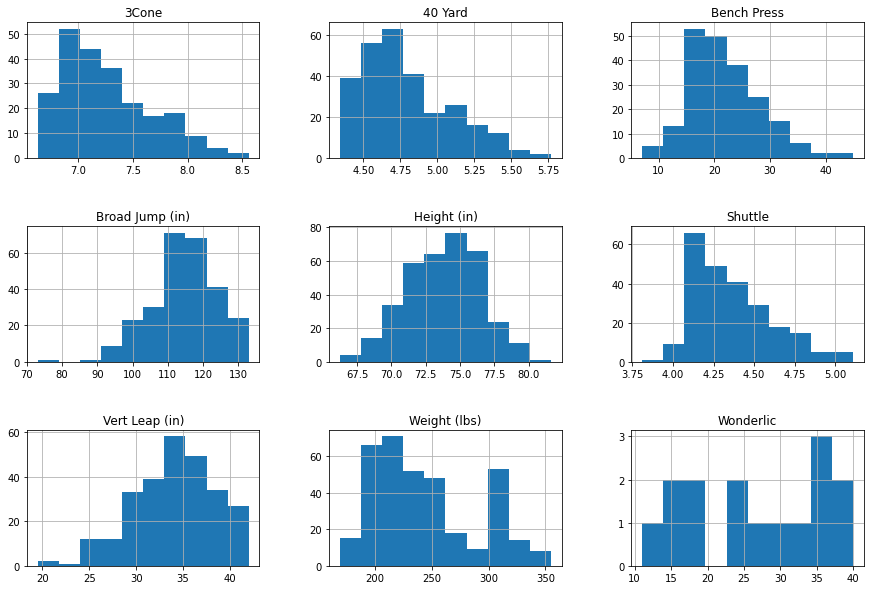

In [144]:
combine_Data.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5);
plt.show()

In [145]:
combine_Data_Avgs = combine_2006.groupby(by='POS').mean()
combine_Data_Avgs = combine_Data_Avgs.drop('Year', axis=1)
combine_Data_Avgs

,Height (in),Weight (lbs),Wonderlic,40 Yard,Bench Press,Vert Leap (in),Broad Jump (in),Shuttle,3Cone
POS,,,,,,,,,
C,75.391111,302.777778,NaN,5.202500,26.000000,28.071429,99.857143,4.614286,7.688571
CB,71.127813,192.750000,NaN,4.513750,14.842105,38.437500,123.625000,4.158125,6.904000
DE,75.354667,260.633333,NaN,4.813043,25.181818,34.250000,115.045455,4.383000,7.340500
DT,74.786552,305.758621,NaN,5.156190,29.000000,31.125000,106.952381,4.572778,7.762778
FB,72.470000,244.666667,NaN,4.821667,24.200000,31.666667,108.166667,4.428333,7.318333
FS,73.067895,206.736842,NaN,4.619231,14.666667,37.461538,123.307692,4.145556,6.861111
ILB,73.281765,240.352941,NaN,4.809333,21.272727,34.785714,113.071429,4.269286,7.204286
K,72.880000,216.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OG,75.815000,319.750000,NaN,5.326923,24.642857,26.863636,100.363636,4.767500,7.931818


In [146]:
shuttle = combine_2006.groupby(by='POS')[['Shuttle']].mean()
three_cone = combine_2006.groupby(by='POS')[['3Cone']].mean()
bench_press = combine_2006.groupby(by='POS')[['Bench Press']].mean()
forty_yard = combine_2006.groupby(by='POS')[['40 Yard']].mean()
height = combine_2006.groupby(by='POS')[['Height (in)']].mean()
weight = combine_2006.groupby(by='POS')[['Weight (lbs)']].mean()
vert_leap = combine_2006.groupby(by='POS')[['Vert Leap (in)']].mean()
broad_jump = combine_2006.groupby(by='POS')[['Broad Jump (in)']].mean()


KeyError: "Columns not found: '40 Yard'"

In [ ]:
(shuttle.reindex(index=shuttle.mean(axis=1)
                          .sort_values(ascending=False)
                          .index)
                            .plot(kind='barh', figsize=(10, 7), title='Position Shuttle Averages'))
plt.xlabel('Seconds (s)')

In [ ]:
(three_cone.reindex(index=three_cone.mean(axis=1)
                          .sort_values(ascending=False)
                          .index)
                            .plot(kind='barh', figsize=(10, 7), title='Position 3Cone Averages'))
plt.xlabel('Seconds (s)')

Text(0.5, 0, 'Reps')

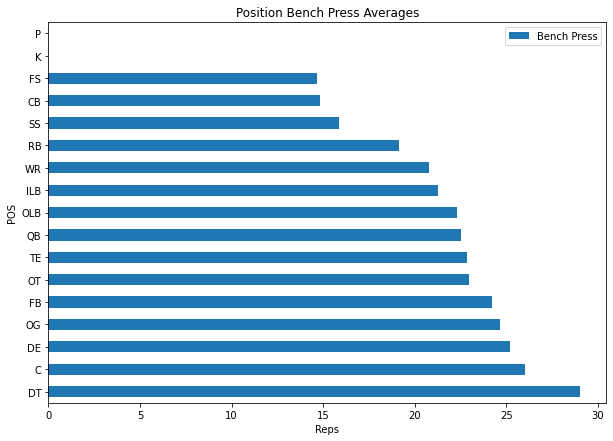

In [147]:
(bench_press.reindex(index=bench_press.mean(axis=1)
                          .sort_values(ascending=False)
                          .index)
                            .plot(kind='barh', figsize=(10, 7), title='Position Bench Press Averages'))
plt.xlabel('Reps')

Text(0.5, 0, 'Inches')

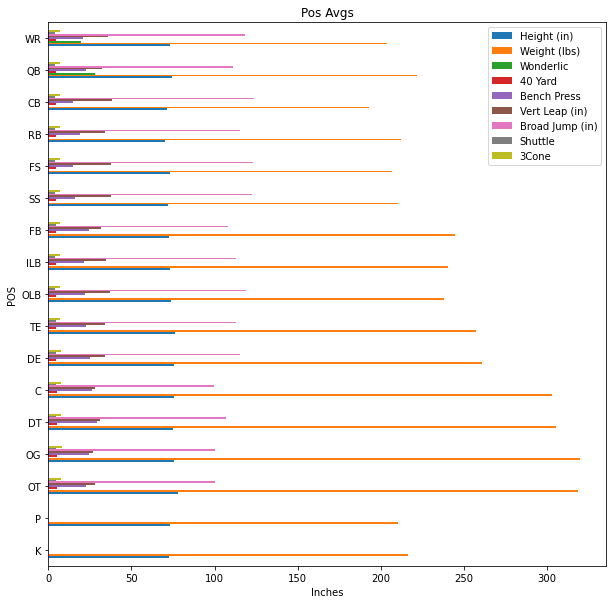

In [148]:
(combine_Data_Avgs.reindex(index=combine_Data_Avgs.mean(axis=1)
                          .sort_values(ascending=False)
                          .index)
                            .plot(kind='barh', figsize=(10, 10), title='Pos Avgs'))
plt.xlabel('Inches')